In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
y=df_train.y

In [5]:
from sklearn.preprocessing import LabelEncoder
train=df_train
test=df_test

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))

Shape train: (4209, 378)
Shape test: (4209, 377)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train=ss.fit_transform(train.drop(['y'],axis=1))
X_test=ss.fit_transform(test)

In [7]:
from sklearn.decomposition import PCA,FastICA


pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ica = FastICA(random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

/home/anirudh/anaconda/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [18]:
for i in range(1, 15):
    train['pca_' + str(i)] = X_train_pca[:,i-1]
    test['pca_' + str(i)] = X_test_pca[:, i-1]
    
    train['ica_' + str(i)] = X_train_ica[:,i-1]
    test['ica_' + str(i)] = X_test_ica[:, i-1]
    
ss2 = StandardScaler()
train=ss.fit_transform(train.drop(['y'],axis=1))
test=ss.fit_transform(test)

In [21]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error

start_time = time.time()

R_RF_L1 = RandomForestRegressor()
#clf_GBC.fit(X_train,y_train)

print("Classifier Created")

R_RF_L1.fit(train,y)
y_pred = R_RF_L1.predict(test)

print("--- %s seconds ---" % (time.time() - start_time))

Classifier Created
--- 1.68564200401 seconds ---


In [22]:
output = pd.DataFrame({'id': df_test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('RadomForestLevel1.csv', index=False)

In [23]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error

start_time = time.time()

clf_RF_L1 = RandomForestRegressor()
#clf_GBC.fit(X_train,y_train)

print("Classifier Created")

score_RF_L1 = cross_val_score(clf_RF_L1,train,y,cv=16,n_jobs=-1)
print("Score Created")
print(score_RF_L1)


y_train_pred_RF_L1 = cross_val_predict(clf_RF_L1,train,y,cv=16,n_jobs=-1)
print("Training data for next level Created")


print("--- %s seconds ---" % (time.time() - start_time))
#print score
print(100-mean_squared_error(y,y_train_pred_RF_L1))


R_RF_L1 = RandomForestRegressor()
R_RF_L1.fit(train,y)
y_test_pred_RF_L1 = R_RF_L1.predict(test)

Classifier Created
Score Created
[ 0.45265268  0.58535072  0.54106415  0.22901145  0.4493297   0.38315573
  0.44805735  0.6439147   0.47428249  0.38187966  0.36214016  0.40843851
  0.45086953  0.5350713   0.56603436  0.43537393]
Training data for next level Created
--- 12.7849299908 seconds ---
11.5828508947


In [24]:
from sklearn.metrics import r2_score
print(r2_score(y,y_train_pred_RF_L1))

0.449897550557


In [25]:
import time
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error
start_time = time.time()

clf_XG_L1 = XGBRegressor()
#clf_GBC.fit(X_train,y_train)

print("Classifier Created")

score_XG_L1 = cross_val_score(clf_XG_L1,train,y,cv=16,n_jobs=-1)
print("Score Created")
print score_XG_L1


y_train_pred_XG_L1 = cross_val_predict(clf_XG_L1,train,y,cv=16,n_jobs=-1)
print("Training data for next level Created")


print("--- %s seconds ---" % (time.time() - start_time))
#print score
print(r2_score(y,y_train_pred_XG_L1))

Classifier Created
Score Created
[ 0.57698604  0.67162979  0.60074898  0.28362881  0.52620089  0.55822244
  0.59209159  0.66108362  0.59689248  0.50933399  0.42929544  0.56172763
  0.58619123  0.64177592  0.65290346  0.54715098]
Training data for next level Created
--- 49.9513390064 seconds ---
0.550670273345


In [26]:
R_XG_L1 = XGBRegressor()
R_XG_L1.fit(train,y)
y_pred_XG_L1 = R_XG_L1.predict(test)

output = pd.DataFrame({'id': df_test['ID'].astype(np.int32), 'y': y_pred_XG_L1})
output.to_csv('try2_XGBLevel1.csv', index=False)

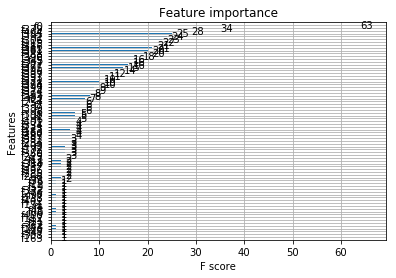

In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
plot_importance(R_XG_L1)
plt.show()
#print(R_XG_L1.feature_importances_)